Clustering - Analisar si las horas invertidas en actividades extracurriculesres y si los estudiantes piensan que esto les hace perder tiempo esta relacionado con que abandonden estas actividades

In [345]:
# Importar las librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

In [346]:
data = pd.read_excel('data.xlsx') 
data.head()

,Edad,¿Con qué género te identificas?,¿A qué carrera perteneces?,Semestre en el que te encuentras (Dado la mayoría de tus materias),¿Realizas alguna actividad extracurricular en la Facultad de Ciencias Físico-Matemático?,¿Dentro de qué categoría clasificas la actividad extracurricular?,¿Cuántas horas a la semana le dedicas a dicha actividad? (Incluyendo prácticas y eventos oficiales ),"¿Consideras que ha tenido un impacto en tu bienestar psicológico? Si la respuesta es sí, ¿consideras que fue un impacto positivo o negativo?",¿Ha dificultado dicha actividad la forma en la que manejas tu tiempo?,"Del siguiente listado de beneficios, marque aquellos que considera ha obtenido gracias al desarrollo de esta actividad",En cuál de los siguientes ámbitos consideras que ha tenido un mayor impacto POSITIVO dicha actividad en tu vida,En cuál de los siguientes ámbitos consideras que ha tenido un mayor impacto NEGATIVO dicha actividad en tu vida,"¿Ha influido dicha actividad en tu desarrollo acádemico? Si es así, ¿Influyó de manera Positiva o Negativa?",¿Consideras importante que los estudiantes universitarios tengan un espacio para desarrollar dichas actividades?,¿Crees importante que los estudiantes universitarios deban tener tiempo para sus actividades extracurriculares además de sus estudios?,¿Te sientes una persona más activa desde que iniciaste la Actividad Extracurricular?,Promedio,¿Piensas abandonar tus actividades?
0,17,2,1,1,1,1,10,1,3,"Manejo del estrés y ansiedad, Manejo del tiemp...",1,1,1,1,1,1,73,1
1,17,1,6,2,1,1,10,1,3,"Manejo del estrés y ansiedad, Socialización, D...",2,3,0,1,1,1,83,1
2,17,3,4,2,1,2,7,1,3,"Socialización, Desarrollo del trabajo en equip...",1,2,0,1,1,1,84,1
3,17,1,3,2,1,1,4,1,2,"Manejo del estrés y ansiedad, Manejo del tiemp...",2,1,1,1,1,1,87,0
4,17,3,6,2,1,4,3,1,3,"Socialización, Desarrollo del trabajo en equip...",3,2,1,1,1,1,96,0


Para el analisis solo necesitaremos las siguentes columnas:
- ¿Piensas abandonar tus actividades?
- ¿Cuántas horas a la semana le dedicas a dicha actividad? (Incluyendo prácticas y eventos oficiales)
- ¿Ha dificultado dicha actividad la forma en la que manejas tu tiempo?

In [347]:
data = data[['¿Piensas abandonar tus actividades?',
             '¿Cuántas horas a la semana le dedicas a dicha actividad? (Incluyendo prácticas y eventos oficiales )',
             '¿Ha dificultado dicha actividad la forma en la que manejas tu tiempo?']]

Para mejorar la manipulacion de los datos, vamos a renombrar las columnas

- Abandonar = ¿Piensas abandonar tus actividades?
- Horas = ¿Cuántas horas a la semana le dedicas a dicha actividad? (Incluyendo prácticas y eventos oficiales )
- Dificultad = ¿Ha dificultado dicha actividad la forma en la que manejas tu tiempo?



In [348]:
data = data.rename(columns={'¿Piensas abandonar tus actividades?':'Abandonar',
             '¿Cuántas horas a la semana le dedicas a dicha actividad? (Incluyendo prácticas y eventos oficiales )':'Horas',
             '¿Ha dificultado dicha actividad la forma en la que manejas tu tiempo?':'Dificultad'})

data

,Abandonar,Horas,Dificultad
0,1,10,3
1,1,10,3
2,1,7,3
3,0,4,2
4,0,3,3
...,...,...,...
202,0,8,3
203,1,7,4
204,0,6,1
205,1,8,3


In [349]:
y = data.iloc[:,0].values
x = data.iloc[:,1:3].values

In [350]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.25,random_state=0)

In [351]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [352]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [353]:
print (classifier.predict(sc.transform([[33,150000]])))

[1]


In [354]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


In [355]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[38  2]
 [ 3  9]]


0.9038461538461539

C:\Users\A\AppData\Local\Temp\ipykernel_3816\1759433531.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j,1], c = ListedColormap(['green', 'red'])(i),label = j)


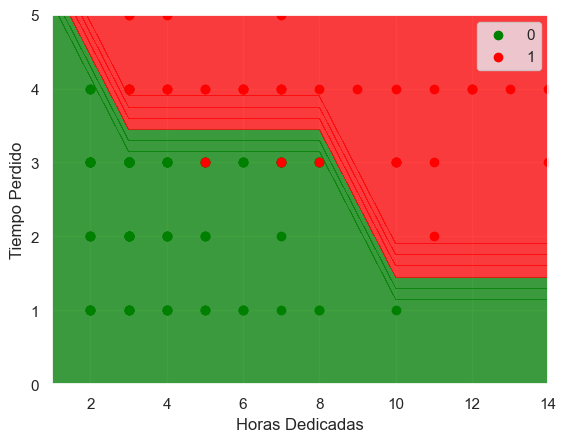

In [356]:
# Visualizar resultados del conjunto de datos de  entrenamiento
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1, stop =X_set[:,0].max()+1, step = 1),
                     np.arange(start = X_set[:,1].min()-1, stop = X_set[:,1].max()+1, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(),X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(['green', 'red']))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j,1], c = ListedColormap(['green', 'red'])(i),label = j)
plt.title('')
plt.xlabel('Horas Dedicadas')
plt.ylabel('Tiempo Perdido')
plt.legend()
plt.show()